**Name: Christ-Brian Amedjonekou**  
**Date: 11/05/2018**  
**TCET 2102-D278 (Telecommunications) Lab 1**  
**Fall 2018, Section: D278, Code: 37580**  
**Instructor: Layth Qaseer**

### Objectives

1. **Learn how to read, use, compare instruments that are dB/dBm-calibrated.**
2. **Relate dB measurements to Voltage measurements.**
3. **Determine the cuttoff frequencies of the RC low pass filter using the difference in dB measurements.**
4. **Evaluate the effects of instrument loading on frequency response.**
5. **Use Thevenin's theorem to calculate a circuit's loaded response.**
6. **Use Audio Test Set, its functions, ranges and limitations; connections, switches, dials, and indicator.**
7. **Use VOM to read dB values, and how the changing ranges affect the dB scale and input impedance.**

### Equipment

* **Audio Test Set**
* **Analog Volt Ohm Meter**
* **Oscilloscope**
* **Digital Multimeter**
* **10 k$\Omega \space \frac{1}{4}$-watt Resistor**
* **0.01 $\mu$F Capacitor**


### Theory

**Filters: Any combination of passive (R, L, and C) and/or active (transistors or operational amplifiers) elements designed to select or reject a band of frequencies is called a filter.**

*  In communication systems, filters are employed to pass those frequencies containing the desired information and to reject the remaining frequencies.

**Filters are employed to filter out any unwanted frequencies, commonly called noise, due to the nonlinear characteristics of some elec- tronic devices or signals picked up from the surrounding medium. In general, there are two classifications of filters:**

* Passive Filters - contains only passive elements (e.g: resistors, capacitors, inductors) **"Passive filters are those filters composed of series or parallel combinations of R, L, and C elements."**
    $$\space$$
    * Low Pass Filters - allows lower frequencies producing a gain about the cuttoff to pass through while higher frequencies are attenuated.

### Low Pass

$$A_V = \frac{V_O}{V_I}=  \frac{1}{\sqrt{\left(\frac{f}{f_C}\right)^2 + 1}} \angle{- \tan^{-1}\frac{f}{f_C}}$$ 

$$\textbf{Note that } f_C = \frac{1}{2\pi RC}$$

In [168]:
import math as m
def lowpassfilter_voltagegain(f_c, f, phase_degree= True):
    """Calculates the voltage gain given the frequency and cuttoff frequency 
    of the low pass filter. Returns a list featuring the magnitude and phase angle.
    The preset variable "phase_degree" is set to true to give an answer in degrees 
    for the phase angle."""
    magnitude = 1/m.sqrt(m.pow(f/f_c, 2) + 1)
    phase_angle = 0 - m.atan(f/f_c)
    if phase_degree == False:
        return [magnitude, phase_angle]
    else:
        return [magnitude, m.degrees(phase_angle)]

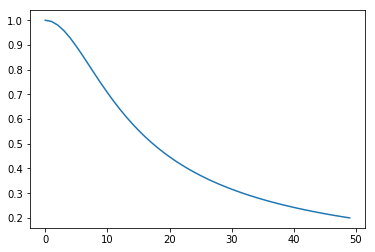

In [188]:
from matplotlib import pyplot as plt
import numpy as np

list1 = [x for x in range(0, 50)]
list2 = [lowpassfilter_voltagegain(10, x)[0] for x in range(0, 50)]
frequency = np.array(list1)
gain = np.array(list2)
plt.plot(frequency, gain)

In [189]:
frequency

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [190]:
gain

array([1.        , 0.99503719, 0.98058068, 0.95782629, 0.92847669,
       0.89442719, 0.85749293, 0.81923192, 0.78086881, 0.74329415,
       0.70710678, 0.67267279, 0.6401844 , 0.60971076, 0.58123819,
       0.5547002 , 0.52999894, 0.50702013, 0.48564293, 0.46574643,
       0.4472136 , 0.42993358, 0.41380294, 0.39872611, 0.38461538,
       0.37139068, 0.35897908, 0.34731436, 0.3363364 , 0.32599068,
       0.31622777, 0.30700278, 0.29827499, 0.2900074 , 0.28216632,
       0.27472113, 0.26764386, 0.26090903, 0.2544933 , 0.24837535,
       0.24253563, 0.23695618, 0.23162053, 0.22651349, 0.2216211 ,
       0.21693046, 0.21242964, 0.20810764, 0.20395425, 0.19996001])

#### Butterworth Low Pass Filter

$$A_V = \frac{V_O}{V_I}=  \frac{1}{\sqrt{\left(\frac{f}{f_C}\right)^{2n} + 1}} \angle{- \tan^{-1}\frac{f}{f_C}}$$ 

$$A_V = \Big|\frac{V_O}{V_I} \Big|^2=  \frac{1}{\left(\frac{f}{f_C}\right)^{2n} + 1} \angle{- \tan^{-1}\frac{f}{f_C}}$$ 

$$|H(j\omega)|=  \frac{1}{\left(\frac{\omega}{\omega_C}\right)^{2n} + 1}$$ 

$$\textbf{Note that } f_C = \frac{1}{2\pi RC}$$  
$$n = \textbf{ number of elements in the filter}$$  
$$|H(j\omega)| = \textbf{Transfer Function}$$

In [187]:
def butterworth_lowpassfilter_voltagegain(f_c, f, n, phase_degree= True):
    """Calculates the voltage gain given the frequency and cuttoff frequency 
    of the low pass filter. Returns a list featuring the magnitude and phase angle.
    The preset variable "phase_degree" is set to true to give an answer in degrees 
    for the phase angle."""
    
    # n is the number of elements in the filter
    magnitude = 1/m.sqrt(m.pow(f/f_c, 2*n) + 1)
    phase_angle = 0 - m.atan(f/f_c)
    if phase_degree == False:
        return [magnitude, phase_angle]
    else:
        return [magnitude, m.degrees(phase_angle)]

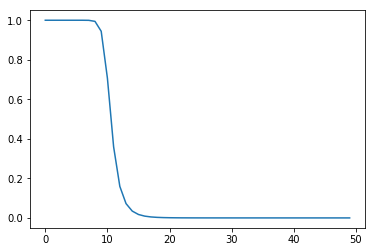

In [193]:
list3 = [x for x in range(0, 50)]
list4 = [butterworth_lowpassfilter_voltagegain(10, x, 10)[0] for x in range(0, 50)]
frequency1 = np.array(list3)
gain1 = np.array(list4)
plt.plot(frequency1, gain1)

In [191]:
frequency1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [194]:
gain1

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       9.99999995e-01, 9.99999523e-01, 9.99981720e-01, 9.99601277e-01,
       9.94284764e-01, 9.44246795e-01, 7.07106781e-01, 3.59733178e-01,
       1.59439554e-01, 7.23480601e-02, 3.45509716e-02, 1.73389230e-02,
       9.09457088e-03, 4.96027145e-03, 2.80074291e-03, 1.63103550e-03,
       9.76562034e-04, 5.99524554e-04, 3.76507092e-04, 2.41391308e-04,
       1.57720294e-04, 1.04857599e-04, 7.08380372e-05, 4.85693574e-05,
       3.37613408e-05, 2.37694986e-05, 1.69350878e-05, 1.22006526e-05,
       8.88178420e-06, 6.52920946e-06, 4.84407468e-06, 3.62509637e-06,
       2.73511123e-06, 2.07961413e-06, 1.59281022e-06, 1.22843994e-06,
       9.53674316e-07, 7.45008852e-07, 5.85473302e-07, 4.62716988e-07,
       3.67682733e-07, 2.93680332e-07, 2.35733706e-07, 1.90117205e-07,
       1.54023726e-07, 1.25325429e-07])